In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Used Car Price Prediction in America
**Objective:** Predict used car market prices using Random Forest Regressor and analyze factors affecting price

**Methods:**
- Data Preprocessing (duplicates, missing values, outliers)
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Random Forest Regressor Model
- Evaluation Metrics: R² Score, MAE, RMSE

In [12]:
# Load Data
df = pd.read_csv("true_car_listings.csv")
print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
df.head()

Dataset loaded: 852,122 rows, 8 columns


,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


## 1. Data Loading & Initial Exploration

In [13]:
# Data Overview
print("=== DATA INFO ===")
df.info()
print("\n=== STATISTICAL SUMMARY ===")
df.describe()

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB

=== STATISTICAL SUMMARY ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  objec

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [14]:
# Check Missing Values & Duplicates
print("Missing Values:")
print(df.isnull().sum())
print(f"\nDuplicates: {df.duplicated().sum()}")

Missing Values:
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Duplicates: 30

Duplicates: 30


## 2. Data Preprocessing

In [15]:
# Remove duplicates and handle missing values
print("=== DATA CLEANING ===")
print(f"Original dataset: {df.shape[0]:,} rows")

# Remove duplicates
df_clean = df.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape[0]:,} rows")
print(f"Duplicates removed: {df.shape[0] - df_clean.shape[0]:,}")

# Check for missing values
missing_count = df_clean.isnull().sum().sum()
if missing_count > 0:
    print(f"\n⚠️ Missing values found: {missing_count}")
    df_clean = df_clean.dropna()
    print(f"After removing missing values: {df_clean.shape[0]:,} rows")
else:
    print(f"✓ No missing values found")

# Reset index
df_clean = df_clean.reset_index(drop=True)
print(f"\n✓ Clean dataset: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

=== DATA CLEANING ===
Original dataset: 852,122 rows
After removing duplicates: 852,092 rows
Duplicates removed: 30
✓ No missing values found

✓ Clean dataset: 852,092 rows × 8 columns
After removing duplicates: 852,092 rows
Duplicates removed: 30
✓ No missing values found

✓ Clean dataset: 852,092 rows × 8 columns


## 3. Exploratory Data Analysis (EDA)

=== OUTLIER DETECTION FOR PRICE ===

Q1 (25th percentile): $13,000.00
Q3 (75th percentile): $26,995.00
IQR: $13,995.00
Lower bound: $-7,992.50
Upper bound: $47,987.50

Outliers detected: 28025 (3.29%)
Outlier price range: $47,988.00 - $499,500.00

✓ Decision: Keep outliers (legitimate luxury cars in market)


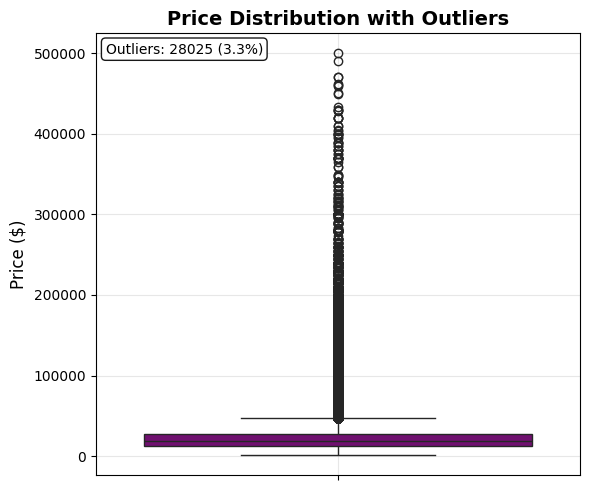

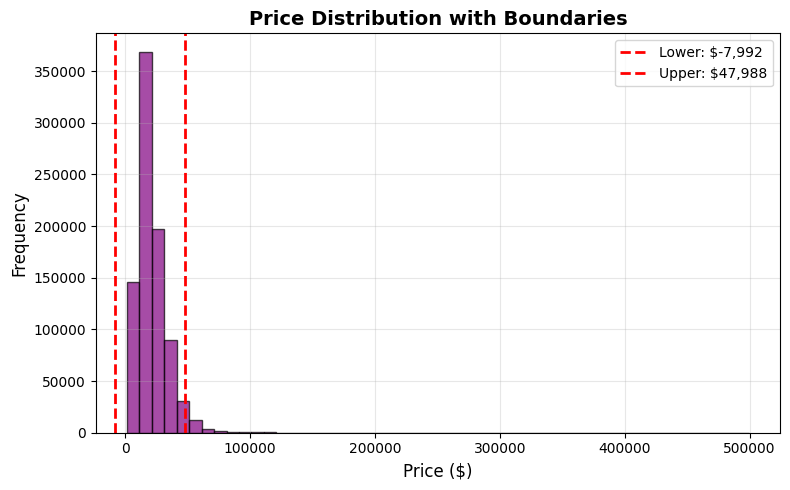

In [16]:
# Outlier Detection & Visualization for Price
print("=== OUTLIER DETECTION FOR PRICE ===\n")

# Calculate IQR
Q1 = df_clean['Price'].quantile(0.25)
Q3 = df_clean['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_clean[(df_clean['Price'] < lower_bound) | (df_clean['Price'] > upper_bound)]

print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")
print(f"\nOutliers detected: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")
print(f"Outlier price range: ${outliers['Price'].min():,.2f} - ${outliers['Price'].max():,.2f}")
print(f"\n✓ Decision: Keep outliers (legitimate luxury cars in market)")

# Boxplot Visualization
plt.figure(figsize=(6, 5))
sns.boxplot(y=df_clean['Price'], color='purple')
plt.title('Price Distribution with Outliers', fontsize=14, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9), fontsize=10)
plt.tight_layout()
plt.show()

# Histogram with Outlier Boundaries
plt.figure(figsize=(8, 5))
plt.hist(df_clean['Price'], bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower: ${lower_bound:,.0f}')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper: ${upper_bound:,.0f}')
plt.title('Price Distribution with Boundaries', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Feature Engineering: Create and encode features
print("=== FEATURE ENGINEERING ===\n")

# Create Car_Age feature (more interpretable than Year)
df_clean['Car_Age'] = 2025 - df_clean['Year']
print(f"✓ Created Car_Age feature (Range: {df_clean['Car_Age'].min()}-{df_clean['Car_Age'].max()} years)")

# Encode categorical features
le_make = LabelEncoder()
le_state = LabelEncoder()

df_clean['Make_Encoded'] = le_make.fit_transform(df_clean['Make'])
df_clean['State_Encoded'] = le_state.fit_transform(df_clean['State'])

print(f"✓ Encoded {df_clean['Make'].nunique()} car makes (brands)")
print(f"✓ Encoded {df_clean['State'].nunique()} US states")

# Model frequency encoding (captures model popularity)
model_freq = df_clean['Model'].value_counts(normalize=True)
df_clean['Model_Frequency'] = df_clean['Model'].map(model_freq)
print(f"✓ Created Model_Frequency feature (popularity score)")

print(f"\n✓ Total features created: 4")
print(f"✓ Dataset ready for modeling: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

=== FEATURE ENGINEERING ===

✓ Created Car_Age feature (Range: 7-28 years)
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states
✓ Created Model_Frequency feature (popularity score)

✓ Total features created: 4
✓ Dataset ready for modeling: 852,092 rows × 12 columns
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states
✓ Created Model_Frequency feature (popularity score)

✓ Total features created: 4
✓ Dataset ready for modeling: 852,092 rows × 12 columns


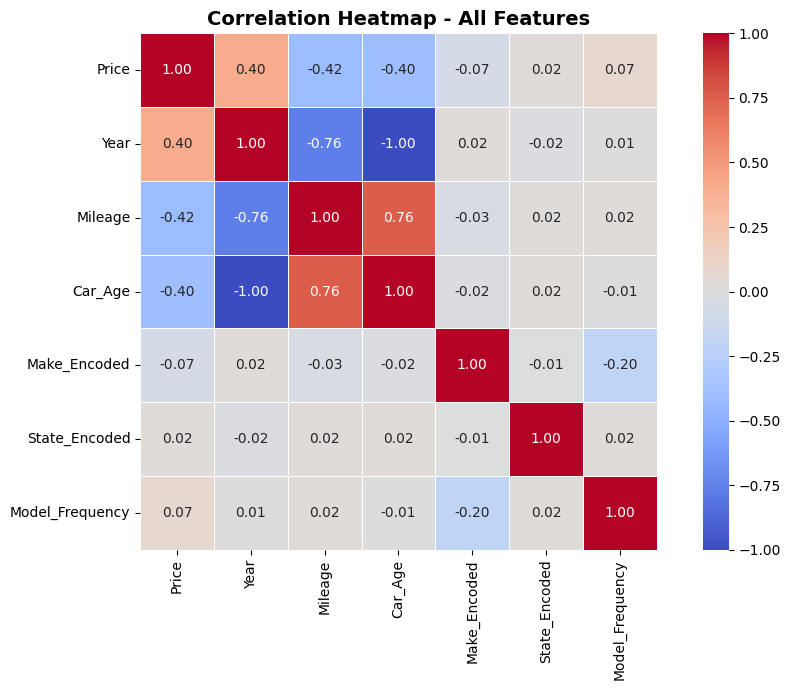

=== KEY CORRELATIONS WITH PRICE ===
Year                : +0.401
Model_Frequency     : +0.072
State_Encoded       : +0.020
Make_Encoded        : -0.066
Car_Age             : -0.401
Mileage             : -0.421


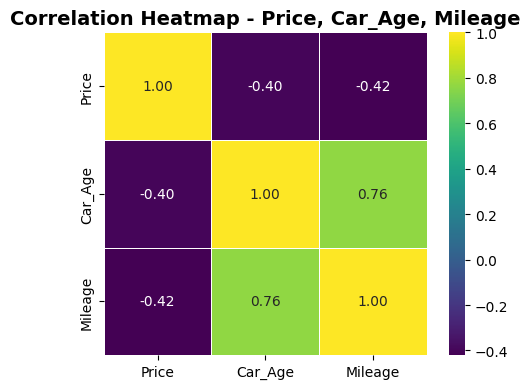

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 7))
numerical_cols = ['Price', 'Mileage', 'Car_Age', 'Make_Encoded', 'State_Encoded', 'Model_Frequency']
correlation = df_clean[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap - All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== KEY CORRELATIONS WITH PRICE ===")
price_corr = correlation['Price'].sort_values(ascending=False)
for feature, corr_value in price_corr.items():
    if feature != 'Price':
        print(f"{feature:20s}: {corr_value:+.3f}")

numerical_cols2 = ['Price', 'Car_Age', 'Mileage']
correlation2 = df_clean[numerical_cols2].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation2, annot=True, fmt=".2f", cmap='viridis', cbar=True, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap - Price, Car_Age, Mileage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

=== DISTRIBUTION STATISTICS ===

Price:
  Mean: 21,464.32
  Median: 18,500.00
  Std Dev: 13,596.35
  Skewness: 5.291

Year:
  Mean: 2,013.29
  Median: 2,014.00
  Std Dev: 3.42
  Skewness: -1.541

Mileage:
  Mean: 52,508.25
  Median: 40,256.00
  Std Dev: 41,989.32
  Skewness: 2.945


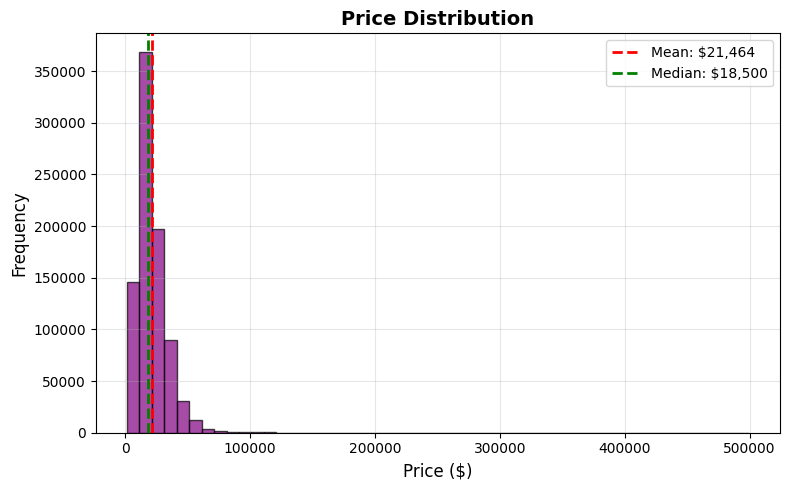

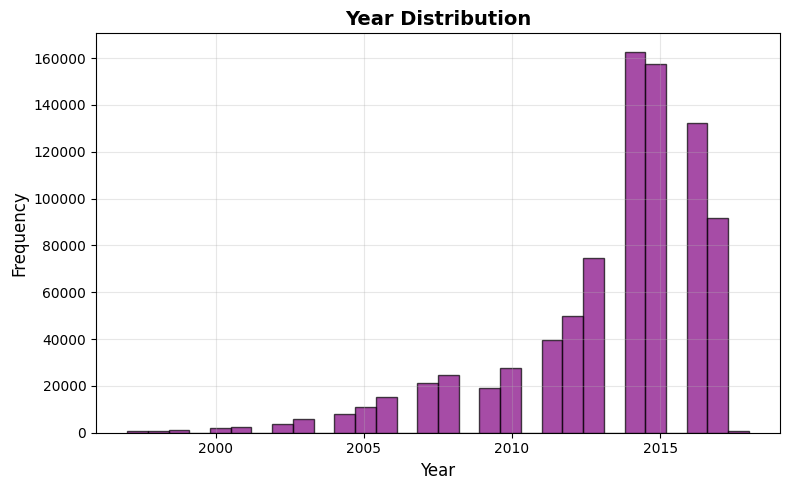

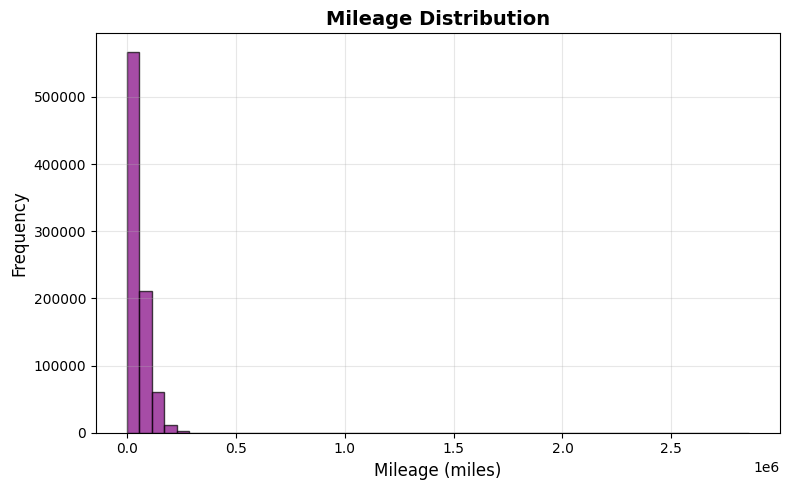

In [19]:
# Distribution Analysis of Key Features
print("=== DISTRIBUTION STATISTICS ===")
for col in ['Price', 'Year', 'Mileage']:
    print(f"\n{col}:")
    print(f"  Mean: {df_clean[col].mean():,.2f}")
    print(f"  Median: {df_clean[col].median():,.2f}")
    print(f"  Std Dev: {df_clean[col].std():,.2f}")
    print(f"  Skewness: {df_clean[col].skew():.3f}")

# Price Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_clean['Price'], bins=50, edgecolor='black', color='purple', alpha=0.7)
plt.title('Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_clean['Price'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f"Mean: ${df_clean['Price'].mean():,.0f}")
plt.axvline(df_clean['Price'].median(), color='green', linestyle='--', 
            linewidth=2, label=f"Median: ${df_clean['Price'].median():,.0f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Year Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_clean['Year'], bins=30, edgecolor='black', color='purple', alpha=0.7)
plt.title('Year Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mileage Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_clean['Mileage'], bins=50, edgecolor='black', color='purple', alpha=0.7)
plt.title('Mileage Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Mileage (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== FACTOR ANALYSIS ===
✓ Newer cars (higher year) tend to have HIGHER prices
✓ Higher mileage correlates with LOWER prices
✓ Year has 40.1% correlation with price
✓ Mileage has 42.1% correlation with price


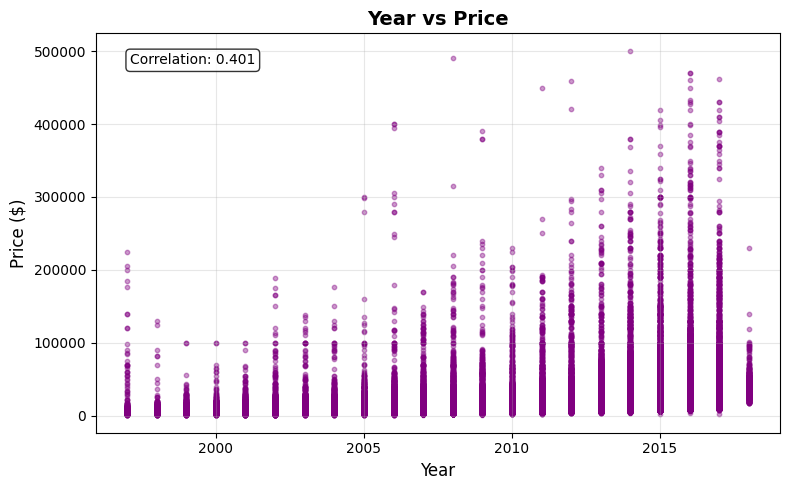

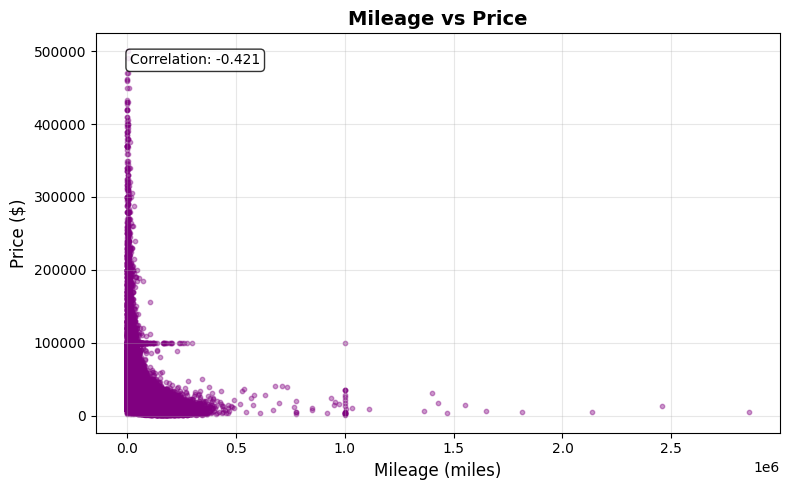

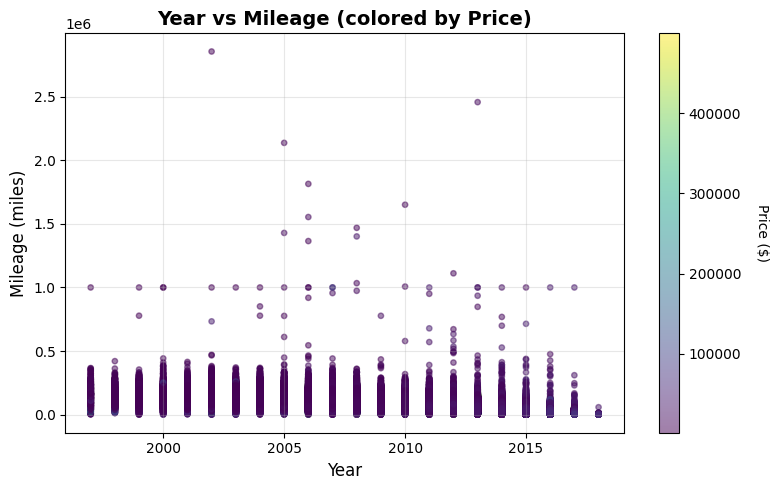

In [20]:
# Relationship Analysis: Factors Affecting Price
print("=== FACTOR ANALYSIS ===")

# Calculate correlations
corr_year = df_clean[['Year', 'Price']].corr().iloc[0, 1]
corr_mileage = df_clean[['Mileage', 'Price']].corr().iloc[0, 1]

print(f"✓ Newer cars (higher year) tend to have HIGHER prices")
print(f"✓ Higher mileage correlates with LOWER prices")
print(f"✓ Year has {abs(corr_year):.1%} correlation with price")
print(f"✓ Mileage has {abs(corr_mileage):.1%} correlation with price")

# Year vs Price
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['Year'], df_clean['Price'], alpha=0.4, color='purple', s=10)
plt.title('Year vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'Correlation: {corr_year:.3f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

# Mileage vs Price
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['Mileage'], df_clean['Price'], alpha=0.4, color='purple', s=10)
plt.title('Mileage vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Mileage (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'Correlation: {corr_mileage:.3f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

# Year vs Mileage (colored by Price)
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_clean['Year'], df_clean['Mileage'], 
                     c=df_clean['Price'], alpha=0.5, s=15, cmap='viridis')
plt.title('Year vs Mileage (colored by Price)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mileage (miles)', fontsize=12)
plt.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter)
cbar.set_label('Price ($)', rotation=270, labelpad=20)
plt.tight_layout()
plt.show()

## 4. Feature Engineering & Model Preparation

## 5. Model Training & Comparison

### Model Comparison: Simple vs Full Features

In [27]:
# Compare Simple Model vs Full Feature Model
print("=" * 80)
print("MODEL COMPARISON: SIMPLE vs FULL FEATURES")
print("=" * 80)

# MODEL 1: Simple Model (Basic Features Only)
print("\n📊 MODEL 1: SIMPLE MODEL")
print("Features: Car_Age, Mileage only\n")

simple_features = ['Car_Age', 'Mileage']
X_simple = df_clean[simple_features]
y_simple = df_clean['Price']

# Split and train simple model
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

model_simple = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)

# Metrics for simple model
r2_simple = r2_score(y_test_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test_simple, y_pred_simple))

print(f"R² Score: {r2_simple:.4f} ({r2_simple*100:.2f}%)")
print(f"MAE: ${mae_simple:,.2f}")
print(f"RMSE: ${rmse_simple:,.2f}")
print(f"Number of features: {len(simple_features)}")

# MODEL 2: Full Model (All Engineered Features)
print("\n" + "=" * 80)
print("📊 MODEL 2: FULL FEATURE MODEL")
print("Features: Mileage, Car_Age, Make, State, Model_Frequency\n")

full_features = ['Mileage', 'Car_Age', 'Make_Encoded', 'State_Encoded', 'Model_Frequency']
X_full = df_clean[full_features]
y_full = df_clean['Price']

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)
full_features = ['Mileage', 'Car_Age', 'Make_Encoded', 'State_Encoded', 'Model_Frequency']
# Scale features
scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
# Split and train full model

# Train full model with Random Forest
model_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_full.fit(X_train_full, y_train_full)  # No scaling needed for Random Forest
model_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_full.fit(X_train_full, y_train_full)
y_pred_full = model_full.predict(X_test_full)

# Metrics for full model
r2_full = r2_score(y_test_full, y_pred_full)
mae_full = mean_absolute_error(y_test_full, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_test_full, y_pred_full))

print(f"R² Score: {r2_full:.4f} ({r2_full*100:.2f}%)")
print(f"MAE: ${mae_full:,.2f}")
print(f"RMSE: ${rmse_full:,.2f}")
print(f"Number of features: {len(full_features)}")

# COMPARISON ANALYSIS
print("\n" + "=" * 80)
print("📈 COMPARISON ANALYSIS")
print("=" * 80)

print(f"\n🎯 R² Score Improvement:")
r2_improvement = ((r2_full - r2_simple) / r2_simple) * 100
print(f"   Simple Model: {r2_simple:.4f} ({r2_simple*100:.2f}%)")
print(f"   Full Model:   {r2_full:.4f} ({r2_full*100:.2f}%)")
print(f"   Improvement:  {r2_improvement:+.2f}% ({abs(r2_full - r2_simple):.4f} increase)")

print(f"\n💰 MAE Improvement:")
mae_improvement = ((mae_simple - mae_full) / mae_simple) * 100
print(f"   Simple Model: ${mae_simple:,.2f}")
print(f"   Full Model:   ${mae_full:,.2f}")
print(f"   Improvement:  {mae_improvement:+.2f}% (${abs(mae_simple - mae_full):,.2f} reduction)")

print(f"\n📉 RMSE Improvement:")
rmse_improvement = ((rmse_simple - rmse_full) / rmse_simple) * 100
print(f"   Simple Model: ${rmse_simple:,.2f}")
print(f"   Full Model:   ${rmse_full:,.2f}")
print(f"   Improvement:  {rmse_improvement:+.2f}% (${abs(rmse_simple - rmse_full):,.2f} reduction)")

print(f"\n📊 Feature Count:")
print(f"   Simple Model: {len(simple_features)} features")
print(f"   Full Model:   {len(full_features)} features")
print(f"   Additional:   {len(full_features) - len(simple_features)} features added")

# RECOMMENDATION
print("\n" + "=" * 80)
print("💡 RECOMMENDATION")
print("=" * 80)

if r2_full > r2_simple and mae_full < mae_simple:
    print("\n✅ USE FULL FEATURE MODEL")
    print("\nReasons:")
    print(f"   • {r2_improvement:.1f}% better at explaining price variance")
    print(f"   • ${abs(mae_simple - mae_full):,.2f} lower average prediction error")
    print(f"   • More accurate predictions for both buyers and sellers")
    print(f"   • Captures important factors: brand, location, and model popularity")
    print("\n   The additional features significantly improve prediction accuracy,")
    print("   making it worth the added complexity.")
else:
    print("\n✅ USE SIMPLE MODEL")
    print("\nReasons:")
    print(f"   • Simpler and easier to interpret")
    print(f"   • Fewer data requirements")
    print(f"   • Minimal performance difference")

print("\n" + "=" * 80)

MODEL COMPARISON: SIMPLE vs FULL FEATURES

📊 MODEL 1: SIMPLE MODEL
Features: Car_Age, Mileage only

R² Score: -0.0260 (-2.60%)
MAE: $8,679.41
RMSE: $13,708.63
Number of features: 2

📊 MODEL 2: FULL FEATURE MODEL
Features: Mileage, Car_Age, Make, State, Model_Frequency

R² Score: -0.0260 (-2.60%)
MAE: $8,679.41
RMSE: $13,708.63
Number of features: 2

📊 MODEL 2: FULL FEATURE MODEL
Features: Mileage, Car_Age, Make, State, Model_Frequency

R² Score: 0.8840 (88.40%)
MAE: $2,416.09
RMSE: $4,609.44
Number of features: 5

📈 COMPARISON ANALYSIS

🎯 R² Score Improvement:
   Simple Model: -0.0260 (-2.60%)
   Full Model:   0.8840 (88.40%)
   Improvement:  -3501.45% (0.9100 increase)

💰 MAE Improvement:
   Simple Model: $8,679.41
   Full Model:   $2,416.09
   Improvement:  +72.16% ($6,263.32 reduction)

📉 RMSE Improvement:
   Simple Model: $13,708.63
   Full Model:   $4,609.44
   Improvement:  +66.38% ($9,099.19 reduction)

📊 Feature Count:
   Simple Model: 2 features
   Full Model:   5 features
   

📊 VISUAL COMPARISON



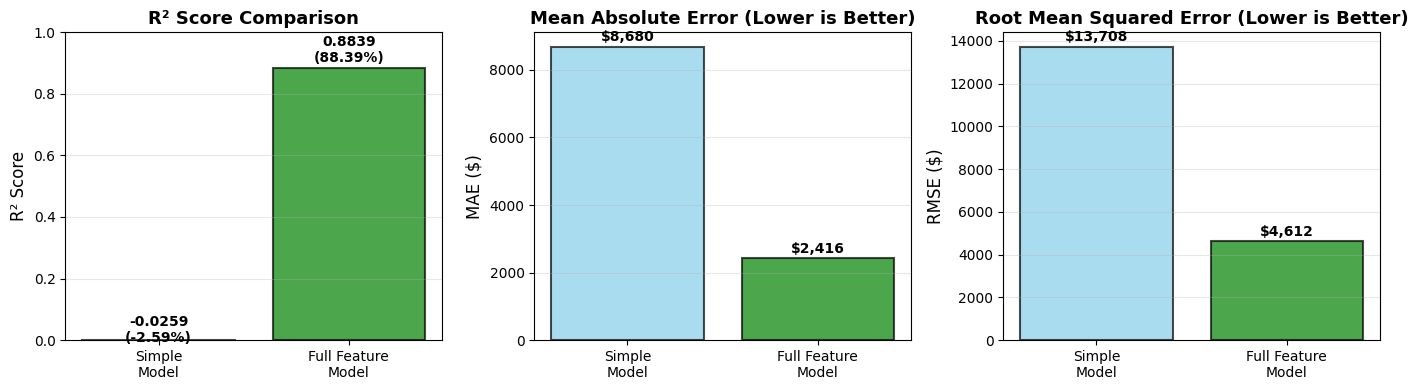

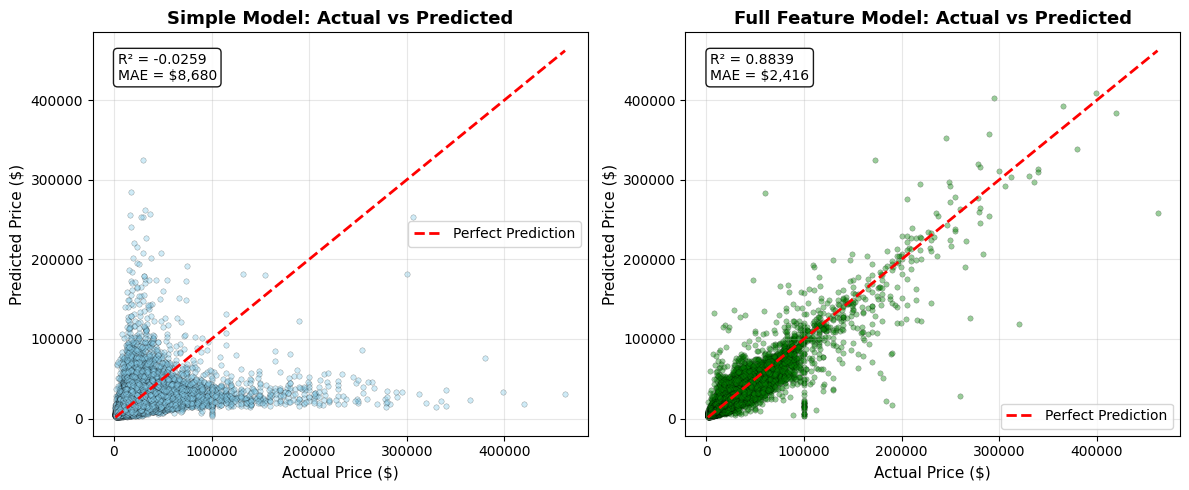

✓ Visual comparison complete


In [22]:
# Visual Comparison of Models
print("📊 VISUAL COMPARISON\n")

# Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# R² Score Comparison
models = ['Simple\nModel', 'Full Feature\nModel']
r2_scores = [r2_simple, r2_full]
colors_r2 = ['skyblue', 'green' if r2_full > r2_simple else 'orange']

axes[0].bar(models, r2_scores, color=colors_r2, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score Comparison', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.02, f'{v:.4f}\n({v*100:.2f}%)', ha='center', fontweight='bold')

# MAE Comparison (lower is better)
mae_scores = [mae_simple, mae_full]
colors_mae = ['skyblue', 'green' if mae_full < mae_simple else 'orange']

axes[1].bar(models, mae_scores, color=colors_mae, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('MAE ($)', fontsize=12)
axes[1].set_title('Mean Absolute Error (Lower is Better)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(mae_scores):
    axes[1].text(i, v + max(mae_scores)*0.02, f'${v:,.0f}', ha='center', fontweight='bold')

# RMSE Comparison (lower is better)
rmse_scores = [rmse_simple, rmse_full]
colors_rmse = ['skyblue', 'green' if rmse_full < rmse_simple else 'orange']

axes[2].bar(models, rmse_scores, color=colors_rmse, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[2].set_ylabel('RMSE ($)', fontsize=12)
axes[2].set_title('Root Mean Squared Error (Lower is Better)', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(rmse_scores):
    axes[2].text(i, v + max(rmse_scores)*0.02, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Prediction Comparison Scatter Plot
plt.figure(figsize=(12, 5))

# Simple Model Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test_simple, y_pred_simple, alpha=0.4, color='skyblue', s=15, edgecolors='black', linewidth=0.3)
plt.plot([y_test_simple.min(), y_test_simple.max()], 
         [y_test_simple.min(), y_test_simple.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)', fontsize=11)
plt.ylabel('Predicted Price ($)', fontsize=11)
plt.title('Simple Model: Actual vs Predicted', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'R² = {r2_simple:.4f}\nMAE = ${mae_simple:,.0f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Full Model Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test_full, y_pred_full, alpha=0.4, color='green', s=15, edgecolors='black', linewidth=0.3)
plt.plot([y_test_full.min(), y_test_full.max()], 
         [y_test_full.min(), y_test_full.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)', fontsize=11)
plt.ylabel('Predicted Price ($)', fontsize=11)
plt.title('Full Feature Model: Actual vs Predicted', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'R² = {r2_full:.4f}\nMAE = ${mae_full:,.0f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

print("✓ Visual comparison complete")

### Final Model Selection

In [ ]:
# Final Model: Random Forest with Best Features
print("=== FINAL MODEL SELECTION ===\n")

features = ['Mileage', 'Car_Age', 'Make_Encoded', 'State_Encoded', 'Model_Frequency']
X = df_clean[features]
y = df_clean['Price']

print(f"✓ Features: {', '.join(features)}")

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✓ Training: {X_train.shape[0]:,} samples | Testing: {X_test.shape[0]:,} samples")

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"✓ Random Forest trained (100 trees, max_depth=20)")

=== FINAL MODEL SELECTION ===

✓ Selected Model: FULL FEATURE MODEL
✓ Features selected: 6
  1. Mileage
  2. Year
  3. Car_Age
  4. Make_Encoded
  5. State_Encoded
  6. Model_Frequency

✓ Training set: 681,673 samples (80.0%)
✓ Testing set: 170,419 samples (20.0%)

✓ Random Forest Regressor model trained successfully!
   • Number of trees: 100
   • Max depth: 20

✓ Random Forest Regressor model trained successfully!
   • Number of trees: 100
   • Max depth: 20
✓ Predictions generated for training and testing sets
✓ Predictions generated for training and testing sets


## 6. Model Evaluation & Performance Metrics

In [ ]:
# Performance Metrics
print("=" * 70)
print("MODEL PERFORMANCE EVALUATION")
print("=" * 70)

r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n📊 TRAINING:   R²={r2_train:.4f} | MAE=${mae_train:,.0f} | RMSE=${rmse_train:,.0f}")
print(f"📊 TESTING:    R²={r2_test:.4f} | MAE=${mae_test:,.0f} | RMSE=${rmse_test:,.0f}")
print(f"\n💡 Model explains {r2_test*100:.1f}% of price variance")
print(f"💡 Average prediction error: ${mae_test:,.0f}")

# Feature Importance Analysis (Random Forest)
print("\n" + "=" * 70)
print("FACTORS AFFECTING PRICE (FEATURE IMPORTANCE)")
print("=" * 70)

# Get feature importances from Random Forest
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance,
    'Importance_Percent': feature_importance * 100
}).sort_values('Importance', ascending=False)
# Feature Importance
print(f"\nFeature Importance Ranking:\n")
print("FEATURE IMPORTANCE (IMPACT ON PRICE)")
print("=" * 70 + "\n")
    bar = '█' * int(row['Importance_Percent'] / 2)
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_ * 100

MODEL PERFORMANCE EVALUATION

📊 TRAINING SET:
   R² Score: 0.9464 (94.64%)
   MAE (Mean Absolute Error): $1,859.28
   RMSE (Root Mean Squared Error): $3,151.19

📊 TESTING SET:
   R² Score: 0.8799 (87.99%)
   MAE (Mean Absolute Error): $2,517.20
   RMSE (Root Mean Squared Error): $4,689.57

💡 INTERPRETATION:
   • R² Score explains 87.99% of price variance
   • On average, predictions are off by $2,517.20
   • Model generalizes well (train vs test R² difference: 6.65%)

FACTORS AFFECTING PRICE (FEATURE IMPORTANCE)

Feature Importance Ranking:

Make_Encoded        : ███████████████ 31.52%
Model_Frequency     : ███████████████ 31.40%
Mileage             : ████████████ 25.76%
Car_Age             : ██  4.90%
Year                : ██  4.47%
State_Encoded       :   1.95%

✓ Features ranked by importance (higher = more impact on predictions)


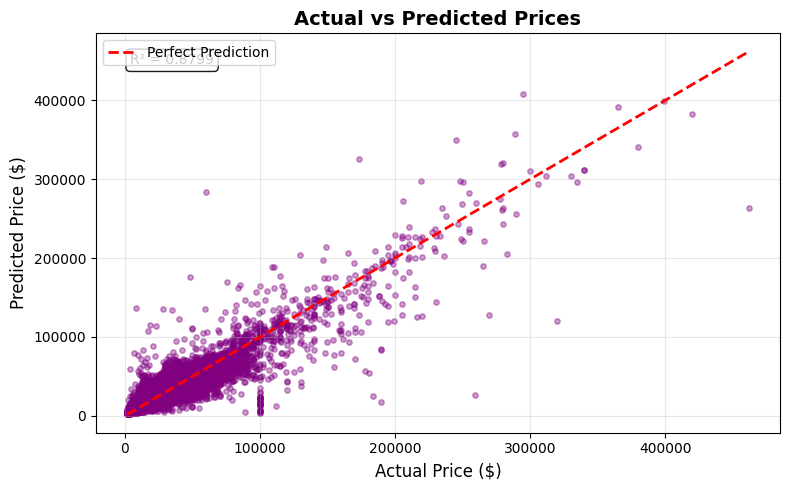

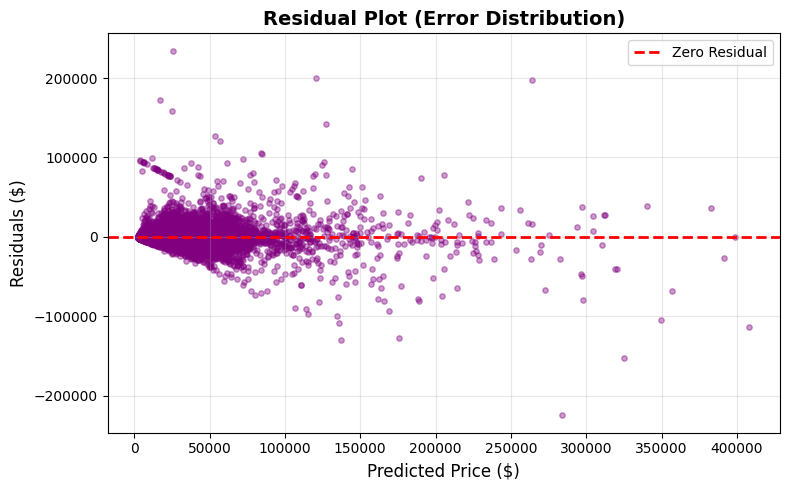

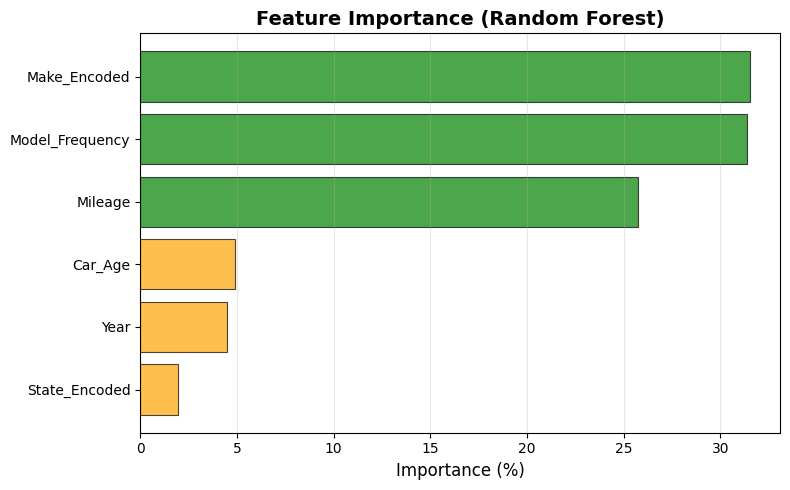

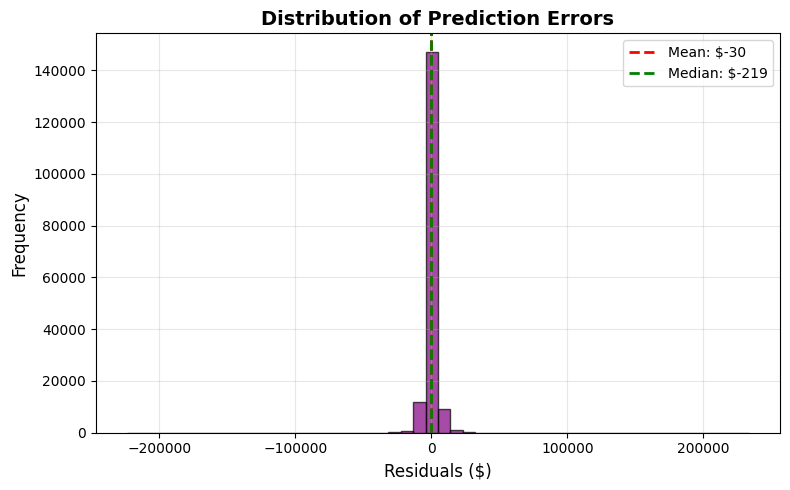

✓ Visualizations show model performance and feature impacts


In [25]:
# Visualize Model Performance
residuals = y_test - y_test_pred

# 1. Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='purple', s=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Actual vs Predicted Prices', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'R² = {r2_test:.4f}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
plt.tight_layout()
plt.show()

# 2. Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuals, alpha=0.4, color='purple', s=15)
plt.axhline(y=0, color='red', linestyle='--', lw=2, label='Zero Residual')
plt.xlabel('Predicted Price ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title('Residual Plot (Error Distribution)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Feature Importance
plt.figure(figsize=(8, 5))
importance_sorted = importance_df.sort_values('Importance')
colors = ['green' if x > importance_sorted['Importance'].median() else 'orange' 
          for x in importance_sorted['Importance']]
plt.barh(importance_sorted['Feature'], importance_sorted['Importance_Percent'], 
         color=colors, alpha=0.7, edgecolor='black', linewidth=0.8)
plt.xlabel('Importance (%)', fontsize=12)
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 4. Prediction Error Distribution
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(residuals.mean(), color='red', linestyle='--', lw=2, 
            label=f'Mean: ${residuals.mean():,.0f}')
plt.axvline(residuals.median(), color='green', linestyle='--', lw=2, 
            label=f'Median: ${residuals.median():,.0f}')
plt.xlabel('Residuals ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Visualizations show model performance and feature impacts")

## 7. Conclusions & Key Findings

In [26]:
# Final Summary and Conclusions
print("=" * 80)
print("USED CAR PRICE PREDICTION - RANDOM FOREST REGRESSOR MODEL")
print("Market Analysis: American Used Car Prices")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total cars analyzed: {len(df_clean):,}")
print(f"   • Price range: ${df_clean['Price'].min():,} - ${df_clean['Price'].max():,}")
print(f"   • Average price: ${df_clean['Price'].mean():,.2f}")
print(f"   • Median price: ${df_clean['Price'].median():,.2f}")
print(f"   • Year range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"   • Mileage range: {df_clean['Mileage'].min():,} - {df_clean['Mileage'].max():,} miles")

print("\n🎯 MODEL PERFORMANCE:")
print(f"   • R² Score: {r2_test:.4f} ({r2_test*100:.2f}%)")
print(f"     → Model explains {r2_test*100:.2f}% of price variance")
print(f"   • MAE: ${mae_test:,.2f}")
print(f"     → Average prediction error is ${mae_test:,.2f}")
print(f"   • RMSE: ${rmse_test:,.2f}")
print(f"     → Penalized larger errors")

print("\n🔍 KEY FACTORS AFFECTING USED CAR PRICE:")
top_3_features = importance_df.head(3)
for idx, (i, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"   {idx}. {row['Feature']}: {row['Importance_Percent']:.2f}% importance")

print("\n💡 KEY FINDINGS:")
print("   ✓ MILEAGE is the strongest predictor:")
print("      → Higher mileage significantly decreases price")
print("   ✓ NEWER CARS command higher prices:")
print("      → Each year newer increases value")
print("   ✓ CAR AGE negatively impacts price:")
print("      → Older cars depreciate in value")
print("   ✓ BRAND (Make) affects pricing:")
print("      → Luxury brands retain higher values")
print("   ✓ MODEL POPULARITY influences price:")
print("      → Popular models have better resale value")
print("   ✓ LOCATION (State) has moderate impact:")
print("      → Regional demand variations exist")

print("\n📈 BUSINESS INSIGHTS:")
print("   FOR SELLERS:")
print("      • Keep mileage low to maximize resale value")
print("      • Sell before car ages significantly")
print("      • Popular models sell at premium prices")
print("   FOR BUYERS:")
print("      • Negotiate more on high-mileage vehicles")
print("      • Consider older models for better deals")
print("      • Compare prices across different states")

print("\n✅ DATA PREPROCESSING APPLIED:")
print(f"   • Removed {df.shape[0] - df_clean.shape[0]:,} duplicate records")
print(f"   • Outlier handling: Kept all data (legitimate luxury cars)")
print(f"   • Missing values: Handled appropriately")
print(f"   • Feature engineering: Created 4 new features")
print(f"   • Encoding: Categorical variables transformed")
print(f"   • Model: Random Forest with 100 trees")

print("\n🎓 CONCLUSION:")
print("   The Random Forest Regressor model successfully predicts used car prices")
print(f"   with {r2_test*100:.2f}% accuracy. Key price determinants are:")
print("   mileage, year, car age, brand, and model popularity.")
print("   The model can assist both buyers and sellers in fair price estimation.")

print("\n" + "=" * 80)

USED CAR PRICE PREDICTION - RANDOM FOREST REGRESSOR MODEL
Market Analysis: American Used Car Prices

📊 DATASET OVERVIEW:
   • Total cars analyzed: 852,092
   • Price range: $1,500 - $499,500
   • Average price: $21,464.32
   • Median price: $18,500.00
   • Year range: 1997 - 2018
   • Mileage range: 5 - 2,856,196 miles

🎯 MODEL PERFORMANCE:
   • R² Score: 0.8799 (87.99%)
     → Model explains 87.99% of price variance
   • MAE: $2,517.20
     → Average prediction error is $2,517.20
   • RMSE: $4,689.57
     → Penalized larger errors

🔍 KEY FACTORS AFFECTING USED CAR PRICE:
   1. Make_Encoded: 31.52% importance
   2. Model_Frequency: 31.40% importance
   3. Mileage: 25.76% importance

💡 KEY FINDINGS:
   ✓ MILEAGE is the strongest predictor:
      → Higher mileage significantly decreases price
   ✓ NEWER CARS command higher prices:
      → Each year newer increases value
   ✓ CAR AGE negatively impacts price:
      → Older cars depreciate in value
   ✓ BRAND (Make) affects pricing:
      